In [1]:
%reset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D #For 3D Plots

#Required by Jupyter for inlining images
%matplotlib inline

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


Functions:

In [2]:
def match_datasets(df_1, col_index_1, df_2, col_index_2, lower_epsilon, upper_epsilon):
    #col_indexes are the names of the columns to search (eg. 'Time Stamp')
    #Epsilon is the tolerance in seconds
    
    lenDf = len(df_1.columns) + len(df_2.columns)
    df = pd.DataFrame()#columns=list(range(0,lenDf)))
    
    matched = 0 #Number of elements matched
    dropped_df_1 = 0 #Number of elements dropped from df_1
    dropped_df_2 = 0 #Number of elements dropped from df_2
    
    #Ensure Dataframes are sorted by timestamp
    df_1 = df_1.sort_values(by=[col_index_1]).reset_index()
    df_2 = df_2.sort_values(by=[col_index_2]).reset_index()
    
    i = 0 #keeps track of index of df_1
    j = 0 #keeps track of index of df_2
    while i < len(df_1[col_index_1])-1 and j < len(df_2[col_index_2])-1:
        #if abs(df_1[col_index_1][i]-df_2[col_index_2][j]) < epsilon:
        if (df_1[col_index_1][i]-df_2[col_index_2][j]) > lower_epsilon and (df_1[col_index_1][i]-df_2[col_index_2][j]) < upper_epsilon:
            #Case 1:
            #Points matched
            matched = matched + 1
            #Add to new DataFrame:
            row = pd.Series(df_1.iloc[i,:].append(df_2.iloc[j,:])).to_frame().T
            df = df.append(row,ignore_index=True)
            #Increment both i and j
            i = i + 1
            j = j + 1
        #Lookahead on i
        elif df_1[col_index_1][i] < df_2[col_index_2][j]:
            #Case 2:
            i = i + 1
            dropped_df_1 = dropped_df_1 + 1 
            while df_1[col_index_1][i] < df_2[col_index_2][j]:
                #if abs(df_1[col_index_1][i]-df_2[col_index_2][j]) < epsilon:
                if (df_1[col_index_1][i]-df_2[col_index_2][j]) > lower_epsilon and (df_1[col_index_1][i]-df_2[col_index_2][j]) < upper_epsilon:
                    #Points Matched
                    matched = matched + 1
                    i = i + 1
                    j = j + 1
                    break
                else:
                    i = i + 1
                    dropped_df_1 = dropped_df_1 + 1
        elif df_1[col_index_1][i] > df_2[col_index_2][j]:
            #Case 3:
            j = j + 1
            dropped_df_2 = dropped_df_2 + 1 
            while df_1[col_index_1][i] > df_2[col_index_2][j]:
                #if abs(df_1[col_index_1][i]-df_2[col_index_2][j]) < epsilon:
                if (df_1[col_index_1][i]-df_2[col_index_2][j]) > lower_epsilon and (df_1[col_index_1][i]-df_2[col_index_2][j]) < upper_epsilon:
                    #Points Matched
                    matched = matched + 1
                    i = i + 1
                    j = j + 1
                    break
                else:
                    j = j + 1
                    dropped_df_2 = dropped_df_2 + 1
                
        
 
    print('Matched: ' + str(matched))
    print('Dropped from 1st df: ' + str(dropped_df_1))
    print('Dropped from 2nd df: ' + str(dropped_df_2))
    #return pd.DataFrame.from_records(rows)
    #print(rows)  
    
    return df

## Read and arrange separate Datasets

Note all this is for Beam 1 only for now

#### TL_BPM

In [3]:
TL_BPM = pd.read_pickle('../Data/Beam1_TL_BPM.pkl')
TL_BPM.describe()

,Time Stamp,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,MSE
count,1.463000e+03,1463.000000,1463.000000,1463.000000,1463.000000,1463.000000,1463.000000,1463.000000,1463.000000,1463.000000,1463.000000,1463.000000,1463.000000,1463.000000,1463.000000,1463.000000,1463.000000,1463.000000,1463.000000,1463.000000
mean,1.537178e+09,0.177103,0.747425,-0.622799,0.490143,-1.083194,-1.026073,-1.024099,-0.723945,0.252059,-0.734644,0.264803,-0.344382,-0.671107,-1.404609,0.166483,-1.229993,-0.454260,-0.335478,0.196936
std,1.645625e+06,0.198043,0.337457,0.312359,0.219021,0.273954,0.335702,0.373043,0.233695,0.214410,0.330142,0.139817,0.210146,0.306106,0.275260,0.153074,0.216674,0.132421,0.169903,0.136026
min,1.534476e+09,-0.631000,-0.146000,-1.963000,-0.105000,-2.269000,-1.795000,-2.760000,-1.128000,-0.682000,-1.287000,-0.055000,-1.144000,-1.570000,-2.250000,-0.719000,-1.758000,-1.151000,-1.120000,0.000000
25%,1.535814e+09,0.022000,0.575000,-0.829000,0.358500,-1.248000,-1.261000,-1.253000,-0.923000,0.103500,-0.978000,0.164000,-0.490500,-0.899500,-1.569000,0.068000,-1.307000,-0.534000,-0.438000,0.124314
50%,1.536547e+09,0.175000,0.762000,-0.642000,0.487000,-1.073000,-1.033000,-1.007000,-0.722000,0.249000,-0.834000,0.267000,-0.341000,-0.660000,-1.389000,0.162000,-1.258000,-0.466000,-0.345000,0.156998
75%,1.538572e+09,0.335000,0.983500,-0.404500,0.670000,-0.957000,-0.813000,-0.798000,-0.578000,0.407000,-0.458000,0.360000,-0.218000,-0.476000,-1.305000,0.261000,-1.199500,-0.385000,-0.240500,0.237513
max,1.540021e+09,0.816000,1.561000,0.421000,1.193000,0.000000,0.000000,0.104000,0.000000,0.879000,0.136000,0.636000,0.306000,0.574000,0.000000,0.661000,0.000000,0.000000,0.128000,1.016407


Just Use MSE for now and Normalise it

In [4]:
Data = pd.DataFrame(data = {'Time Stamp BPM' : TL_BPM['Time Stamp'], 'BPM MSE': TL_BPM['MSE']})
Data['BPM MSE'] = (Data['BPM MSE']-min(Data['BPM MSE']))/(max(Data['BPM MSE'])-min(Data['BPM MSE']))
Data.head()

,Time Stamp BPM,BPM MSE
0,1.534476e+09,0.000000
1,1.534476e+09,0.013231
2,1.534476e+09,0.005537
3,1.534476e+09,0.008761
4,1.534477e+09,0.011608


Text(0.5,1,'MSE of Collimator Positions in the TL')

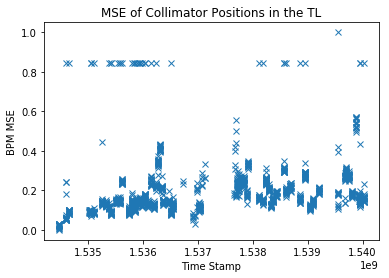

In [5]:
fig = plt.figure()
plt.plot(Data['Time Stamp BPM'],Data['BPM MSE'],'x')
plt.xlabel('Time Stamp')
plt.ylabel('BPM MSE')
plt.title('MSE of Collimator Positions in the TL')

#NOTE: Here look at the plot, it looks like 2 separate tests happened here
#Should the MSE of the second test be based on the position of the first row, or on 
#the position of the first row of the second test?

#### TDI BLM Readings

In [6]:
BLM = pd.read_pickle('../Data/Beam1_BLM.pkl')
BLM.describe()

,Time Stamp,Reading 1,Reading 2,Reading 3
count,1.898000e+03,1898.000000,1898.000000,1898.000000
mean,1.537150e+09,0.117479,0.131212,0.109946
std,1.675666e+06,0.132458,0.127527,0.123250
min,1.534476e+09,0.000000,0.000000,0.000000
25%,1.535796e+09,0.011825,0.024877,0.003993
50%,1.536506e+09,0.094571,0.116093,0.089513
75%,1.538614e+09,0.156472,0.185786,0.147227
max,1.540021e+09,1.000000,1.000000,1.000000


Note: Readings already normalised

We'll just use Reading 1 since we showed they're highly correlated (an alternative to look into could be to put everything in then use PCA to lower the dimension)

In [7]:
BLM = pd.DataFrame(data={'Time Stamp BLM':BLM['Time Stamp'], 'BLM': BLM['Reading 1']})
BLM.head()

,Time Stamp BLM,BLM
0,1.534476e+09,0.032946
1,1.534476e+09,0.054595
2,1.534476e+09,0.031869
3,1.534476e+09,0.057333
4,1.534477e+09,0.045874


#### Merge the 2 Datasets

In [8]:
Data = match_datasets(BLM,'Time Stamp BLM',Data,'Time Stamp BPM', 14 ,20)
Data.head()

Matched: 1420
Dropped from 1st df: 475
Dropped from 2nd df: 42


,index,Time Stamp BLM,BLM,index,Time Stamp BPM,BPM MSE
0,0.0,1.534476e+09,0.032946,0.0,1.534476e+09,0.000000
1,1.0,1.534476e+09,0.054595,1.0,1.534476e+09,0.013231
2,2.0,1.534476e+09,0.031869,2.0,1.534476e+09,0.005537
3,3.0,1.534476e+09,0.057333,3.0,1.534476e+09,0.008761
4,4.0,1.534477e+09,0.045874,4.0,1.534477e+09,0.011608


Drop Index Columns

In [9]:
Data = Data.drop(['index'],axis=1)
Data.head()

,Time Stamp BLM,BLM,Time Stamp BPM,BPM MSE
0,1.534476e+09,0.032946,1.534476e+09,0.000000
1,1.534476e+09,0.054595,1.534476e+09,0.013231
2,1.534476e+09,0.031869,1.534476e+09,0.005537
3,1.534476e+09,0.057333,1.534476e+09,0.008761
4,1.534477e+09,0.045874,1.534477e+09,0.011608


#### Intensities (LHC-SPS)

In [10]:
Intensities = pd.read_pickle('../Data/intensities.pkl')
Intensities = pd.DataFrame({'Time Stamp LHC': Intensities['Time Stamp'], 'LHC-SPS':Intensities['Change in Intensities']})
Intensities.head()

,Time Stamp LHC,LHC-SPS
0,1.534476e+09,-9.420752e+08
1,1.534476e+09,-9.910938e+08
2,1.534476e+09,1.496010e+09
3,1.534476e+09,1.760888e+10
4,1.534477e+09,-1.270084e+09


Normalise Readings:

In [11]:
Intensities['LHC-SPS'] = (Intensities['LHC-SPS']-min(Intensities['LHC-SPS']))/(max(Intensities['LHC-SPS'])-min(Intensities['LHC-SPS']))
Intensities['LHC-SPS'].describe()

count    1022.000000
mean        0.993315
std         0.056351
min         0.000000
25%         0.999598
50%         0.999738
75%         0.999818
max         1.000000
Name: LHC-SPS, dtype: float64

#### Merge all datasets together

In [12]:
Data = match_datasets(Intensities,'Time Stamp LHC',Data,'Time Stamp BPM', 14 ,20)
Data.head()

Matched: 901
Dropped from 1st df: 120
Dropped from 2nd df: 5


,index,Time Stamp LHC,LHC-SPS,index,Time Stamp BLM,BLM,Time Stamp BPM,BPM MSE
0,0.0,1.534476e+09,0.999797,0.0,1.534476e+09,0.032946,1.534476e+09,0.000000
1,1.0,1.534476e+09,0.999797,1.0,1.534476e+09,0.054595,1.534476e+09,0.013231
2,2.0,1.534476e+09,0.999806,2.0,1.534476e+09,0.031869,1.534476e+09,0.005537
3,3.0,1.534476e+09,0.999864,3.0,1.534476e+09,0.057333,1.534476e+09,0.008761
4,4.0,1.534477e+09,0.999796,4.0,1.534477e+09,0.045874,1.534477e+09,0.011608


Drop Index:

In [13]:
Data = Data.drop(['index'],axis=1)
Data.head()

,Time Stamp LHC,LHC-SPS,Time Stamp BLM,BLM,Time Stamp BPM,BPM MSE
0,1.534476e+09,0.999797,1.534476e+09,0.032946,1.534476e+09,0.000000
1,1.534476e+09,0.999797,1.534476e+09,0.054595,1.534476e+09,0.013231
2,1.534476e+09,0.999806,1.534476e+09,0.031869,1.534476e+09,0.005537
3,1.534476e+09,0.999864,1.534476e+09,0.057333,1.534476e+09,0.008761
4,1.534477e+09,0.999796,1.534477e+09,0.045874,1.534477e+09,0.011608


Check Time Stamp Differences:

Text(0,0.5,'Time Stamp Diff (BLM)')

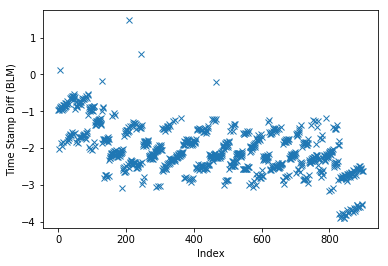

In [14]:
plt.figure()
plt.plot(Data.index.values,Data['Time Stamp LHC']-Data['Time Stamp BLM'],'x')
plt.xlabel('Index')
plt.ylabel('Time Stamp Diff (BLM)')

Text(0,0.5,'Time Stamp Diff (BLM)')

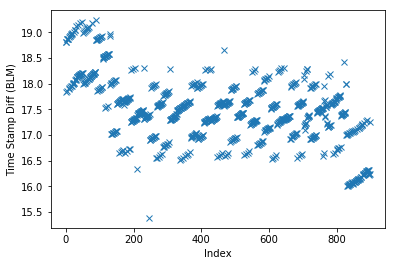

In [22]:
plt.figure()
plt.plot(Data.index.values,Data['Time Stamp LHC']-Data['Time Stamp BPM'],'x')
plt.xlabel('Index')
plt.ylabel('Time Stamp Diff (BLM)')

Text(0,0.5,'Time Stamp Diff (BLM)')

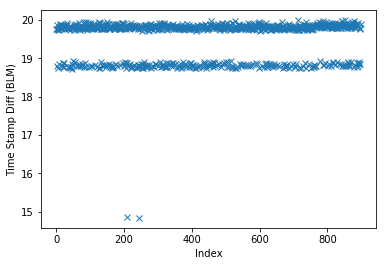

In [23]:
plt.figure()
plt.plot(Data.index.values,Data['Time Stamp BLM']-Data['Time Stamp BPM'],'x')
plt.xlabel('Index')
plt.ylabel('Time Stamp Diff (BLM)')

## Run DBSCAN

In [15]:
from sklearn.cluster import DBSCAN

In [16]:
X = pd.DataFrame(data={'LHC-SPS':Data['LHC-SPS'],'BLM':Data['BLM'],'BPM MSE':Data['BPM MSE']})
#n_jobs=-1 means use all processors
#########################################
#This seems to work well:
clustering = DBSCAN(eps=0.3,min_samples=50,n_jobs=-1).fit(X)
#########################################
#Here another point is found to be an anomaly
#clustering = DBSCAN(eps=0.2,min_samples=10,n_jobs=-1).fit(X)
#########################################

In [17]:
#clustering.labels_
X['Predicted Value'] = clustering.labels_
is_anomaly = X['Predicted Value']==-1
Anomalies = X[is_anomaly]

not_anomaly = X['Predicted Value']!=-1
Inliers = X[not_anomaly]

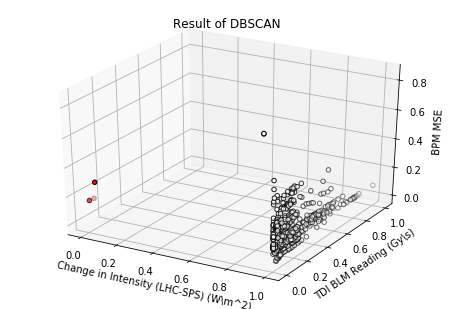

In [18]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(Anomalies['LHC-SPS'],Anomalies['BLM'],Anomalies['BPM MSE'],c='red',
                edgecolor='k', s=20)
ax.scatter(Inliers['LHC-SPS'],Inliers['BLM'],Inliers['BPM MSE'],c='white',
                edgecolor='k', s=20)
ax.set_xlabel('Change in Intensity (LHC-SPS) (W\m^2)')
ax.set_ylabel('TDI BLM Reading (Gy\s)')
ax.set_zlabel('BPM MSE')
ax.set_title('Result of DBSCAN')
plt.show()

In [34]:
int(Data.loc[Anomalies.index[0],:]['Time Stamp LHC'])

1537841926

In [29]:
Intensities.loc[Anomalies.index,:]

,Time Stamp LHC,LHC-SPS
846,1.537026e+09,0.999890
866,1.537035e+09,0.999809
895,1.537698e+09,0.999786


## Run LOF

In [35]:
from sklearn.neighbors import LocalOutlierFactor

In [36]:
X = pd.DataFrame(data={'LHC-SPS':Data['LHC-SPS'],'BLM':Data['BLM'],'BPM MSE':Data['BPM MSE']})
lof = LocalOutlierFactor(n_neighbors=20,contamination=0.01, n_jobs=-1).fit_predict(X)

/home/marc/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [37]:
X['Predicted Value'] = lof
is_anomaly = X['Predicted Value']==-1
Anomalies = X[is_anomaly]

not_anomaly = X['Predicted Value']!=-1
Inliers = X[not_anomaly]

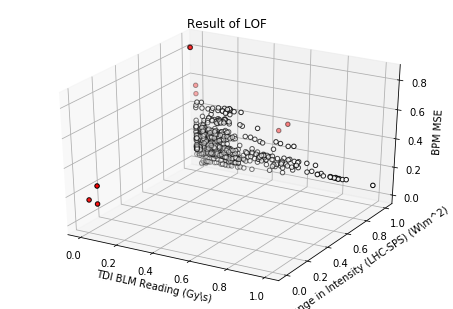

In [38]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(Anomalies['BLM'],Anomalies['LHC-SPS'],Anomalies['BPM MSE'],c='red',
                edgecolor='k', s=20)
ax.scatter(Inliers['BLM'],Inliers['LHC-SPS'],Inliers['BPM MSE'],c='white',
                edgecolor='k', s=20)
ax.set_ylabel('Change in Intensity (LHC-SPS) (W\m^2)')
ax.set_xlabel('TDI BLM Reading (Gy\s)')
ax.set_zlabel('BPM MSE')
ax.set_title('Result of LOF')
plt.show()